# Importy

In [110]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


# Dane

### Pobranie danych

In [35]:
DATA_FOLDER = os.path.join(os.getcwd(), 'dane')
datasets = {}

#### Mieszkania

In [37]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Najem_mieszkania.csv'))
print(data.head())
datasets['Najem_mieszkania'] = data

    rok powierzchnia  wartosc
0  2024       0 - 40     3011
1  2024      40 - 59     3841
2  2024      60 - 89     5816
3  2023       0 - 40     2869
4  2023      40 - 59     3691


### Wynagrodzenie

In [79]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Wynagrodzenie.csv'))
print(data.head())
datasets['Wynagrodzenie'] = data

    rok doswiadczenie     typ umowy  wartosc
0  2024        senior           uop    12032
1  2024        senior  zlecenie/b2b    26249
2  2024        junior           uop     5808
3  2024        junior  zlecenie/b2b     6648
4  2024           mid           uop     8514


### Zywnosc

In [105]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Zywnosc.csv'), sep=';')
COLUMNS = ['nazwa_pozycja_2', 'opis_okres', 'wartosc']
data = data[COLUMNS]

# Uśrednij wartości dla każdej kategorii i okresu
data['opis_okres'] = data['opis_okres'].apply(lambda x: x.split(' ')[0])
average_data = data.groupby(['nazwa_pozycja_2', 'opis_okres'])['wartosc'].mean()
data = average_data.reset_index()

datasets['Zywnosc'] = data


## Wizualizacja

#### Mieszkania

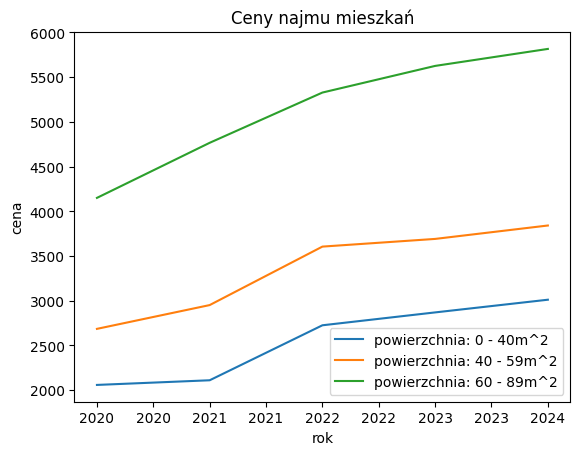

In [82]:
unique_areas = datasets["Najem_mieszkania"]['powierzchnia'].unique()

data = datasets["Najem_mieszkania"]
for area in unique_areas:
    area_data = data[data['powierzchnia'] == area]
    plt.plot(area_data['rok'], area_data['wartosc'], label=f'powierzchnia: {area}m^2')
    plt.xlabel('rok')
    plt.ylabel('cena')
    plt.title('Ceny najmu mieszkań')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.legend()

#### Wynagrodzenie

C:\Users\mateu\AppData\Local\Temp\ipykernel_16176\3260830722.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_experience_data = type_data[data['doswiadczenie'] == experience]
C:\Users\mateu\AppData\Local\Temp\ipykernel_16176\3260830722.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_experience_data = type_data[data['doswiadczenie'] == experience]
C:\Users\mateu\AppData\Local\Temp\ipykernel_16176\3260830722.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_experience_data = type_data[data['doswiadczenie'] == experience]


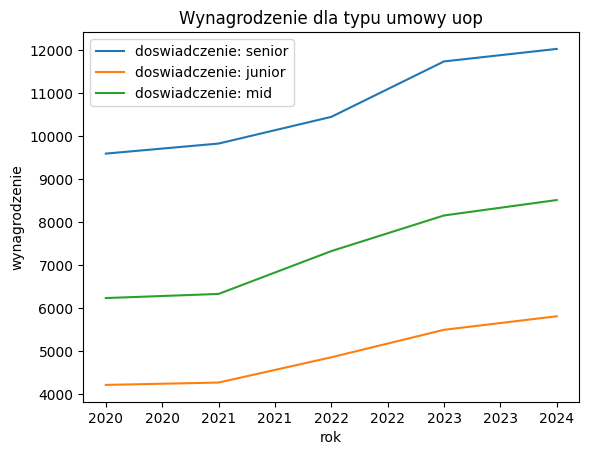

C:\Users\mateu\AppData\Local\Temp\ipykernel_16176\3260830722.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_experience_data = type_data[data['doswiadczenie'] == experience]
C:\Users\mateu\AppData\Local\Temp\ipykernel_16176\3260830722.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_experience_data = type_data[data['doswiadczenie'] == experience]
C:\Users\mateu\AppData\Local\Temp\ipykernel_16176\3260830722.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  type_experience_data = type_data[data['doswiadczenie'] == experience]


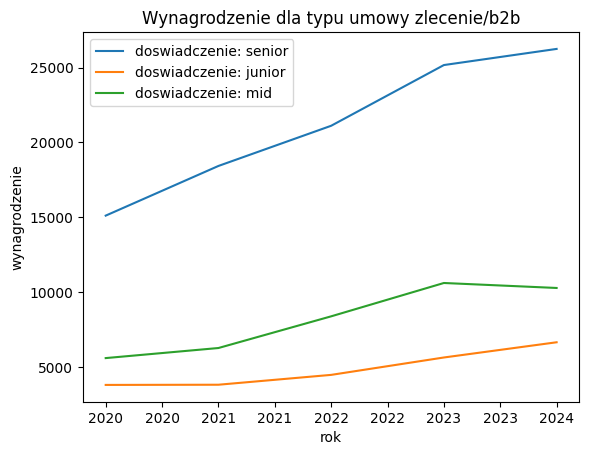

In [80]:
employement_types = datasets["Wynagrodzenie"]['typ umowy'].unique()
employement_experience = datasets["Wynagrodzenie"]['doswiadczenie'].unique()

data = datasets["Wynagrodzenie"]
for type in employement_types:
    type_data = data[data['typ umowy'] == type]
    for experience in employement_experience:
        type_experience_data = type_data[data['doswiadczenie'] == experience]
        plt.plot(type_experience_data['rok'], type_experience_data['wartosc'], label=f'doswiadczenie: {experience}')
        plt.xlabel('rok')
        plt.ylabel('wynagrodzenie')
        plt.title(f'Wynagrodzenie dla typu umowy {type}')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    plt.legend()
    plt.show()

#### Zywnosc

Lista produktoów: ['buraki za 1 kg' 'cebula za 1 kg' 'chleb pszenno-żytni za 0.5 kg'
 'cukier biały kryształ za 1 kg' 'filety z morszczuka mrożone za 1 kg'
 'jabłka za 1 kg' 'jaja kurze świeże za 1 szt'
 'kasza jęczmienna za 0.5 kg' 'kiełbasa wędzona za 1 kg'
 'kurczęta patroszone za 1 kg' 'marchew za 1 kg'
 'masło świeże o zawartości tłuszczu ok. 82,5% za 200 g'
 'mięso wieprzowe z kością (schab środkowy) za 1 kg'
 'mięso wołowe bez kości (z udźca) za 1 kg'
 'mięso wołowe z kością (rostbef) za 1 kg'
 'mleko krowie spożywcze o zawartości tłuszczu 3-3,5%, sterylizowane za 1 l'
 'mąka pszenna za 1 kg' 'olej rzepakowy produkcji krajowej za 1 l'
 'polędwica drobiowa za 1 kg' 'pomarańcze za 1 kg'
 'ser twarogowy półtłusty za 1 kg' 'sok jabłkowy za 1 l'
 'szynka wieprzowa gotowana za 1 kg' 'ziemniaki za 1 kg']


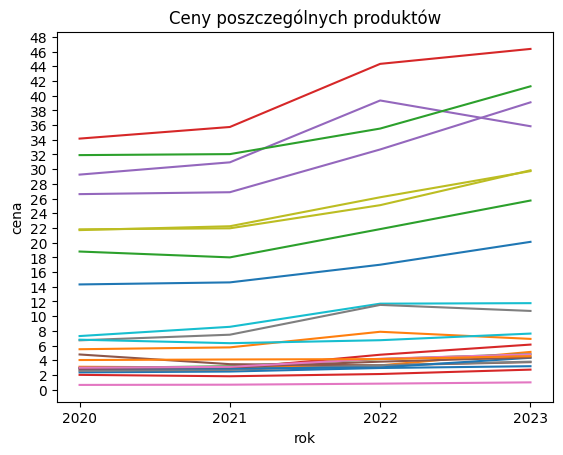

In [115]:
unique_foods = datasets["Zywnosc"]['nazwa_pozycja_2'].unique()

data = datasets["Zywnosc"]
print("Lista produktoów:", unique_foods)
for food in unique_foods:
    food_data = data[data['nazwa_pozycja_2'] == food]
    plt.plot(food_data['opis_okres'], food_data['wartosc'])
    plt.xlabel('rok')
    plt.ylabel('cena')
    plt.yticks(np.arange(0, 50, 2))
    plt.title('Ceny poszczególnych produktów')

Text(0.5, 1.0, 'Średnia cena produktów spożywczych')

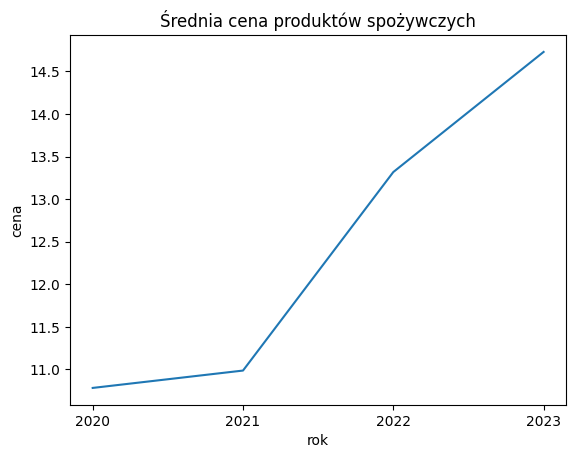

In [117]:
data = datasets["Zywnosc"]
average_data = data.groupby(['opis_okres'])['wartosc'].mean()
plt.plot(food_data['opis_okres'], average_data)
plt.xlabel('rok')
plt.ylabel('cena')
plt.title('Średnia cena produktów spożywczych')